**Capítulo 3**: Classificação

O Capítulo 3 do livro "Hands-On Machine Learning with Scikit-Learn & TensorFlow" foca inteiramente nos **sistemas de classificação** e nas diversas métricas de desempenho usadas para avaliá-los. Ele contrasta com as tarefas de regressão (prever valores) exploradas no Capítulo 2, voltando-se para a predição de classes.

### Principais Conceitos Detalhados do Capítulo 3:

1.  **Dataset MNIST**
    *   O capítulo inicia utilizando o famoso **dataset MNIST** como exemplo principal para tarefas de classificação.
    *   Ele é composto por 70.000 **pequenas imagens de dígitos manuscritos** (de 0 a 9). Cada imagem já vem rotulada com o dígito que representa, caracterizando um problema clássico de classificação multiclasse.
    *   O dataset é convenientemente **pré-dividido** em um conjunto de treinamento (as primeiras 60.000 imagens) e um conjunto de teste (as últimas 10.000 imagens).
    *   Uma prática recomendada é **embaralhar (shuffling)** o conjunto de treinamento. Isso garante que todos os *folds* de validação cruzada sejam representativos e impede que algoritmos sensíveis à ordem recebam muitas instâncias similares em sequência, o que poderia prejudicar seu desempenho.

2.  **Medidas de Desempenho para Classificadores**
    *   Avaliar um classificador é frequentemente **mais complexo** do que um regressor, exigindo a compreensão de várias métricas.

    *   **Acurácia e Validação Cruzada**:
        *   A **validação cruzada (cross-validation)** é apresentada como uma maneira robusta de avaliar modelos, assim como no Capítulo 2.
        *   A função `cross_val_score()` do Scikit-Learn é usada para essa avaliação, mas o capítulo também mostra como implementar a validação cruzada manualmente para maior controle.
        *   A classe `StratifiedKFold` é destacada por realizar **amostragem estratificada**, garantindo que cada *fold* de validação cruzada contenha uma proporção representativa de cada classe, evitando viés.
        *   `cross_val_predict()` é introduzida para retornar as **predições "limpas"** (feitas por um modelo que nunca viu os dados durante o treinamento) de cada instância no conjunto de treinamento através da validação cruzada.

    *   **Matriz de Confusão**:
        *   É uma ferramenta visual e numérica poderosa para analisar o desempenho de um classificador.
        *   Ela mostra a quantidade de instâncias que pertencem à classe A, mas foram classificadas como classe B.
        *   Uma matriz ideal terá a **maioria das instâncias na diagonal principal**, indicando classificações corretas. A análise de sua representação visual pode revelar os tipos de erros mais comuns.

    *   **Precisão (Precision) e Recall (Sensibilidade/Taxa de Verdadeiro Positivo - TPR)**:
        *   A **Precisão** mede a acurácia das predições positivas. É a razão entre o número de **verdadeiros positivos (TP)** e a soma dos verdadeiros positivos e falsos positivos (FP) (`TP / (TP + FP)`).
        *   O **Recall** (também conhecido como Sensibilidade ou Taxa de Verdadeiro Positivo) mede a proporção de instâncias positivas que são corretamente detectadas pelo classificador. É a razão entre os verdadeiros positivos (TP) e a soma dos verdadeiros positivos e falsos negativos (FN) (`TP / (TP + FN)`).
        *   O **F1-Score** é a média harmônica de precisão e recall. Ele favorece classificadores que possuem valores semelhantes para ambas as métricas, sendo útil quando precisão e recall são igualmente importantes (`2 * (Precision * Recall) / (Precision + Recall)`).
        *   Existe um **trade-off inerente entre Precisão e Recall**: aumentar um geralmente causa a diminuição do outro. A escolha do equilíbrio ideal depende do contexto específico do projeto (e.g., em detecção de vídeos impróprios para crianças, alta precisão é prioritária, mesmo que o recall seja baixo; em detecção de ladrões, alto recall é mais importante).
        *   É possível visualizar esse trade-off **plotando a precisão e o recall em função do limiar de decisão** (`threshold`) do classificador.

    *   **Curva ROC (Receiver Operating Characteristic)**:
        *   Similar à curva Precisão/Recall, mas plota a **Taxa de Verdadeiro Positivo (Recall)** contra a **Taxa de Falso Positivo (FPR)**.
        *   A FPR é a razão de instâncias negativas que foram incorretamente classificadas como positivas (`FP / (FP + TN)`).
        *   Um bom classificador idealmente se mantém o mais distante possível da linha pontilhada de um classificador puramente aleatório, movendo-se em direção ao canto superior esquerdo do gráfico.
        *   A **Área Sob a Curva (AUC)** é uma métrica que resume o desempenho do classificador em toda a faixa de limiares. Um classificador perfeito tem ROC AUC igual a 1, enquanto um classificador aleatório tem 0.5. A AUC é útil para comparar classificadores de forma geral.

3.  **Classificação Multiclasse, Multilabel e Multioutput**
    *   **Classificação Multiclasse**: Lida com mais de duas classes. Estratégias comuns para algoritmos binários incluem:
        *   **One-versus-All (OvA)** ou One-versus-Rest: Treina um classificador binário para cada classe, distinguindo-a de todas as outras.
        *   **One-versus-One (OvO)**: Treina um classificador binário para cada par de classes.
        *   Algoritmos como `SGDClassifier` e `SVM` são binários e usam OvA por padrão. Outros, como `RandomForestClassifier` ou `LogisticRegression`, podem lidar diretamente com multiclasses.
    *   **Classificação Multilabel**: Sistemas que produzem múltiplas **saídas binárias** para cada instância (e.g., uma imagem pode conter Alice e Charlie simultaneamente, resultando em `` para Alice, Bob, Charlie).
    *   **Classificação Multioutput**: Uma generalização da classificação multilabel, onde cada rótulo pode, por sua vez, ser **multiclasse** (ter mais de duas classes possíveis).

4.  **Análise de Erros**
    *   Após a seleção de um modelo promissor, a análise dos erros que ele comete é **fundamental para seu aprimoramento**.
    *   A **visualização da matriz de confusão** ajuda a identificar os tipos de erros mais frequentes (e.g., no MNIST, pode-se notar que o classificador confunde frequentemente 3s com 5s).
    *   O capítulo sugere que o pré-processamento de dados, como centralizar e rotacionar imagens, pode ajudar a reduzir erros específicos. A análise de erros permite refinar a abordagem ou adicionar novas *features*.

O capítulo conclui reforçando a importância de seguir um *checklist* de projeto (como o do Apêndice B) e oferece exercícios práticos para solidificar o aprendizado, com soluções disponíveis online.

### **Implementação**

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Fetch the MNIST dataset from OpenML
def fetch_mldata(dataname, transpose_data=True, data_home='files'):
    # Use fetch_openml to get the dataset
    mnist = fetch_openml(name=dataname, version=1, as_frame=False, data_home=data_home)
    label, data_values = mnist['data'], mnist['target']
    if transpose_data:
        label = label.T
    return label, data_values

In [3]:
mnist = fetch_mldata('mnist_784')

In [4]:
mnist

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(784, 70000)),
 array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object))

In [5]:
X, y = mnist[0], mnist[1]

In [6]:
X.shape

(784, 70000)

In [7]:
y.shape

(70000,)

In [8]:
some_digit = X[:, 36000]
some_digit_image = some_digit.reshape(28, 28)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

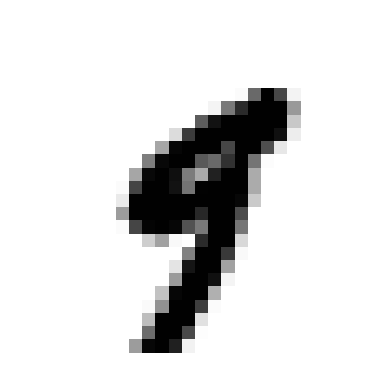

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [10]:
y[36000]

'9'

In [11]:
X_train, X_test, y_train, y_test = X[:, :60000], X[:, 60000:], y[:60000], y[60000:]

In [12]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[:, shuffle_index], y_train[shuffle_index]

In [13]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [14]:
# Recompute y_train_9 after shuffling y_train
y_train_9 = (y_train == '9')
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train.T, y_train_9)
print(np.unique(y_train_9))  # Should print [False  True]

[False  True]


In [15]:
sgd_clf.predict([some_digit])

array([False])

In [16]:
cross_val_score(sgd_clf, X_train.T, y_train_9, cv=3, scoring="accuracy")

array([0.94215, 0.9503 , 0.94125])

In [17]:
y_train_pred = cross_val_predict(sgd_clf, X_train.T, y_train_9, cv=3)

In [18]:
confusion_matrix(y_train_9, y_train_pred)

array([[52494,  1557],
       [ 1769,  4180]])

In [19]:
precision_score(y_train_9, y_train_pred)

0.7286037998954157

In [20]:
recall_score(y_train_9, y_train_pred)

0.7026390990082367

O modelo está correto 59% das vezes (precisão) e detecta 81% dos números 9 (exatidão).

In [21]:
f1_score(y_train_9, y_train_pred)

0.715385931884306

A pontuação F1 é uma média ponderada da precisão e da revocação, que leva em conta tanto os falsos positivos quanto os falsos negativos.
É uma métrica útil quando há um desbalanceamento entre as classes. Como resultado, o modelo só possuirá altos valores de F1 quando ambos, precisão e revocação, forem altos.
 


In [22]:
y_scores = cross_val_predict(sgd_clf, X_train.T, y_train_9, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precisão")
    plt.plot(thresholds, recalls[:-1], "g-", label="Revocação")
    plt.xlabel("Limiar de decisão")
    plt.legend(loc="center left")
    plt.ylim([0, 1])
    plt.xlim([-5000, 5000])
    plt.title("Precisão e Revocação vs Limiar de Decisão")
    plt.show()

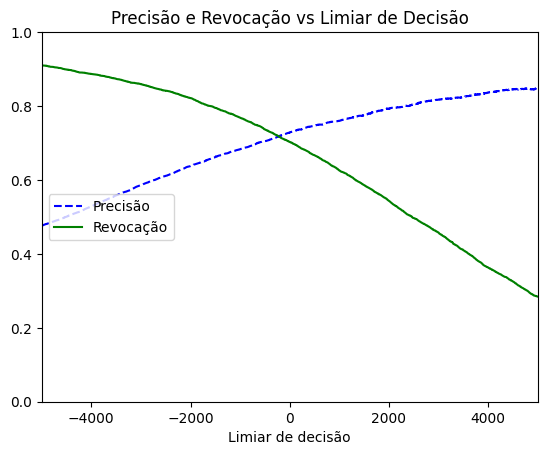

In [24]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [25]:
def plot_roc_courve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Linha diagonal
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

C:\Users\andre\AppData\Local\Temp\ipykernel_27976\4053837262.py:2: MatplotlibDeprecationWarning: Passing label as a length 4906 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(fpr, tpr, linewidth=2, label=label)


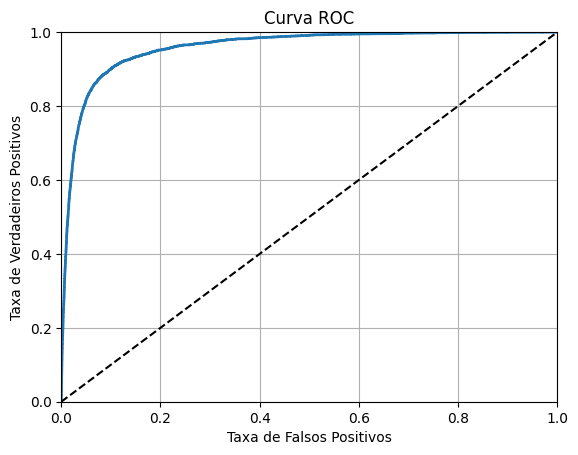

In [26]:
plot_roc_courve(*roc_curve(y_train_9, y_scores))

In [27]:
roc_auc_score(y_train_9, y_scores)

np.float64(0.9581486451479888)

Classificadores multiclasse:

In [28]:
sgd_clf.fit(X_train.T, y_train)
sgd_clf.predict([some_digit])

array(['4'], dtype='<U1')

In [29]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-30357.0789959 , -17115.33173572, -22529.58239154,
         -1699.88116415,  -1049.91201887,  -8013.24378571,
        -24105.13813745,  -3668.33605875,  -4484.00321124,
         -2102.14395987]])

In [30]:
np.argmax (some_digit_scores)
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [31]:
sgd_clf.classes_[5]

np.str_('5')

In [32]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [33]:
ovo_clf.fit(X_train.T, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [34]:
ovo_clf.predict([some_digit])

array(['4'], dtype=object)

In [35]:
len(ovo_clf.estimators_)

45

In [36]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train.T, y_train)

RandomForestClassifier(random_state=42)

In [37]:
forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [38]:
forest_clf.predict_proba([some_digit])

array([[0.  , 0.01, 0.01, 0.  , 0.1 , 0.02, 0.  , 0.  , 0.01, 0.85]])

In [39]:
cross_val_score(sgd_clf, X_train.T, y_train, cv=3, scoring="accuracy")

array([0.8754, 0.882 , 0.8782])

In [40]:
y_train_pred = cross_val_predict(sgd_clf, X_train.T, y_train, cv=3)

In [41]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5721,    1,   21,   20,    8,   42,   39,    6,   49,   16],
       [   4, 6051,  117,   65,   13,   44,   14,   17,  368,   49],
       [  84,   37, 5165,  131,   72,   48,  113,   52,  235,   21],
       [  83,   14,  174, 5245,   12,  210,   30,   48,  206,  109],
       [  17,   12,   45,   27, 5146,   36,   48,   14,  106,  391],
       [ 107,    9,   45,  256,   65, 4404,  144,   13,  295,   83],
       [  55,    6,   70,   12,   34,   81, 5581,    4,   69,    6],
       [  18,    8,   92,   42,   91,   37,    5, 5400,   63,  509],
       [  79,   37,   84,  261,   42,  302,   46,   12, 4834,  154],
       [  43,    7,   28,  104,  246,   85,    2,  136,  133, 5165]])

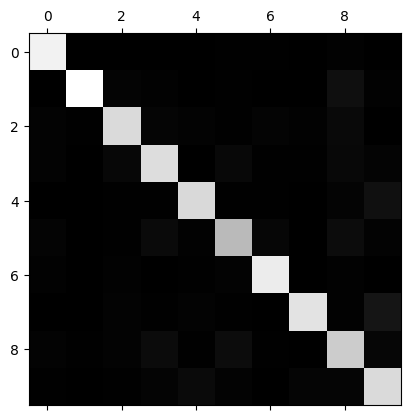

In [42]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [43]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
normalized_conf_mx = conf_mx / row_sums

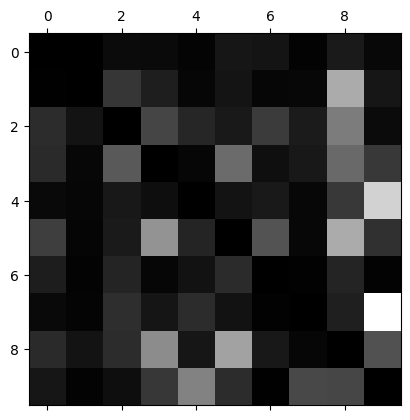

In [44]:
np.fill_diagonal(normalized_conf_mx, 0)
plt.matshow(normalized_conf_mx, cmap=plt.cm.gray)
plt.show()

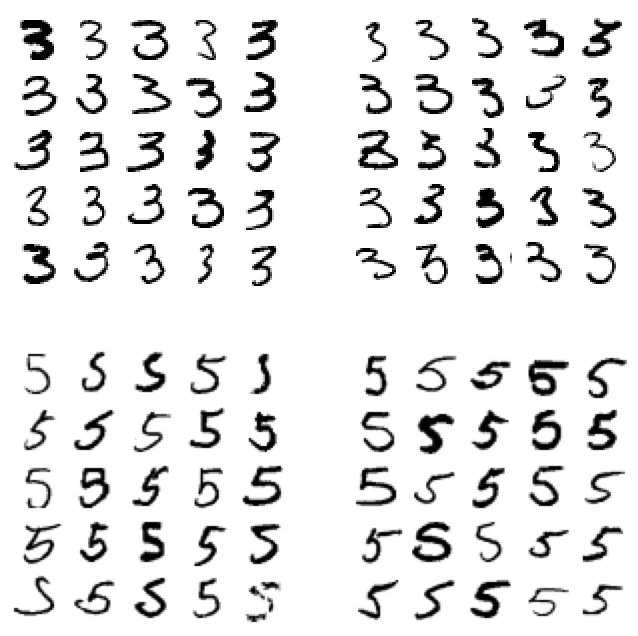

In [45]:

def plot_digits(instances, images_per_row=10, **options):
	size = 28  
	if len(instances) == 0 or images_per_row <= 0:
		raise ValueError("instances must not be empty and images_per_row must be greater than 0")
	images_per_row = min(len(instances), images_per_row)
	images = [instance.reshape(size, size) for instance in instances]
	n_rows = (len(instances) - 1) // images_per_row + 1
	row_images = []
	for row in range(n_rows):
		rimages = images[row * images_per_row:(row + 1) * images_per_row]
		row_images.append(np.concatenate(rimages, axis=1))
	image = np.concatenate(row_images, axis=0)
	plt.imshow(image, cmap=matplotlib.cm.binary, **options)
	plt.axis("off")

cl_a, cl_b = 3, 5

X_aa = X_train.T[(y_train == str(cl_a)) & (y_train_pred == str(cl_a))]
X_ab = X_train.T[(y_train == str(cl_a)) & (y_train_pred == str(cl_b))]
X_ba = X_train.T[(y_train == str(cl_b)) & (y_train_pred == str(cl_a))]
X_bb = X_train.T[(y_train == str(cl_b)) & (y_train_pred == str(cl_b))]

plt.figure(figsize=(8, 8))

plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

Classificação multilabel

In [46]:
y_train_int = y_train.astype(int)
y_train_large = (y_train_int >= 7)
y_train_odd = (y_train_int % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [47]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train.T, y_multilabel)

KNeighborsClassifier()

In [48]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [49]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train.T, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.9772874133296205

Classificação Multioutput

In [50]:
noise = np.random.randint(0, 100, X_train.shape)
X_train_noisy = X_train + noise
noise = np.random.randint(0, 100, X_test.shape)
X_test_noisy = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

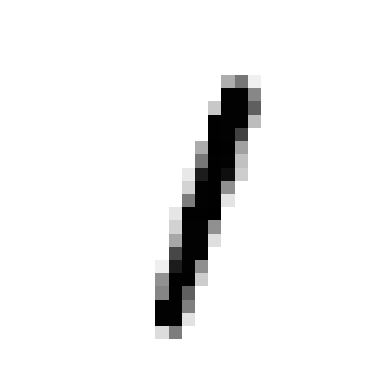

In [51]:
some_index = 5  

knn_clf.fit(X_train_noisy.T, y_train_mod.T)
clean_digit = knn_clf.predict([X_test_noisy.T[some_index]])
plot_digits(clean_digit)

### **Exercícios**

1) Tente construir um classificador para o conjunto de dados do MNIST que obtenha uma acurácia acima de 97% no conjunto de teste. Dica: o KNeighborsClassifier funciona muito bem para esta tarefa; você só precisa encontrar bons valores do hiperparâmetro (experimente um grid search nos pesos e hiperparâmetros n_neighbors).

In [52]:
X_train_knn = X_train.T
X_test_knn = X_test.T
y_train_knn = y_train
y_test_knn = y_test

param_grid = {
    'n_neighbors': [3, 4, 5],
    'weights': ['uniform', 'distance']
}

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train_knn, y_train_knn)

print("Melhores parâmetros:", grid_search.best_params_)
print("Acurácia no teste:", grid_search.score(X_test_knn, y_test_knn))

Melhores parâmetros: {'n_neighbors': 4, 'weights': 'distance'}
Acurácia no teste: 0.9714


2) Escreva uma função que possa mudar uma imagem do MNST em qualquer direção (Esquerda, direita, para cima ou para baixo) em um pixel. Então, para cada imagem no conjunto de treinamento, crie quatro cópias deslocadas (uma por direção) e as adicione ao conjunto expandido de treinamento e meça sua acurácia no conjunto de teste. Você notará que seu modelo funciona ainda melhor agora! Esta técnica de crescimento artificial do conjunto de treinamento é chamada de datra augmentation ou expansão do conjunto de treinamento

In [53]:
def shift_image(image, direction):
    image = image.reshape(28, 28)
    if direction == 'up':
        shifted = np.roll(image, -1, axis=0)
        shifted[-1, :] = 0
    elif direction == 'down':
        shifted = np.roll(image, 1, axis=0)
        shifted[0, :] = 0
    elif direction == 'left':
        shifted = np.roll(image, -1, axis=1)
        shifted[:, -1] = 0
    elif direction == 'right':
        shifted = np.roll(image, 1, axis=1)
        shifted[:, 0] = 0
    else:
        raise ValueError("direction must be 'up', 'down', 'left' or 'right'")
    return shifted.flatten()

X_train_expanded = X_train.T
y_train_expanded = y_train.copy()

directions = ['up', 'down', 'left', 'right']
augmented_images = []
augmented_labels = []

for img, label in zip(X_train_expanded, y_train_expanded):
    for direction in directions:
        shifted_img = shift_image(img, direction)
        augmented_images.append(shifted_img)
        augmented_labels.append(label)

X_train_aug = np.vstack([X_train_expanded] + [np.array(augmented_images)])
y_train_aug = np.hstack([y_train_expanded, np.array(augmented_labels)])

knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_aug, y_train_aug)
accuracy = knn_clf.score(X_test.T, y_test)
print("Acurácia no teste com conjunto expandido:", accuracy)

Acurácia no teste com conjunto expandido: 0.9763


3) Encare o conjunto de dados Titanic

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

train = pd.read_csv('titanic_train.csv')

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

train.drop('Cabin',axis=1,inplace=True)
train.head()
train.dropna(inplace=True)

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived',axis=1), 
    train['Survived'], 
    test_size=0.30, 
    random_state=101
)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
warnings.filterwarnings("ignore")

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.82      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.81      0.77      0.78       267
weighted avg       0.80      0.80      0.80       267

